In [1]:
import math as m
def k(x,y):
    k = (y+m.exp(-x))/m.exp(2*x) ## To check k's value with i.c
    return k
print(k(0,0))
print(k(-4,-1))

1.0
159773.83343196218


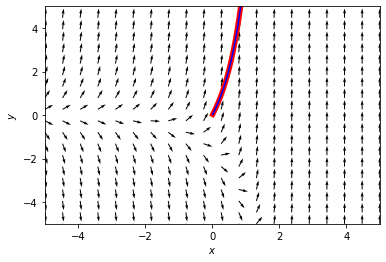

In [3]:
import matplotlib.pyplot as plt
from scipy import *
from scipy import integrate
from scipy.integrate import ode
import numpy as np
import math 

fig = plt.figure(num=1)
ax=fig.add_subplot(111)


## Vector field function
## x[0] = x // x[1] = y

def vf(t,x):
  dx=np.zeros(2)

  dx[0]=1
  dx[1]= 2*x[1] + 3*np.exp(-x[0]) ## <- Here equation of dy/dx
  return dx

##Solution curves
t0=0; tEnd=10; dt=0.01;
r = ode(vf).set_integrator('vode', method='bdf',max_step=dt)

##Initial conditions for ecah line with its color
ic=[[0,0]]
color=['r']
listY = [] ## Lista vacia para añadir valores de Y del for..


for k in range(len(ic)):
    Y=[];T=[];S=[];
    r.set_initial_value(ic[k], t0).set_f_params()
    while r.successful() and r.t +dt < tEnd:
        r.integrate(r.t+dt)
        Y.append(r.y)

    S=np.array(np.real(Y))
    ax.plot(S[:,0],S[:,1], color = color[k], lw = 5.25)
    
    for elem in S[:,1]:
        listY.append(elem)
        
    

##Vector field with its linespace(interval)
X,Y = np.meshgrid( np.linspace(-5,5,20),np.linspace(-5,5,20) )

V = 2*Y + 3*np.exp(X)  ## <- Here equation of dy/dx


##Normalize arrows not to have long arrows similar
U = 1
N = np.sqrt(U**2+V**2)  
U2, V2 = U/N, V/N
ax.quiver( X,Y,U2, V2)

##Analytical solution
xs = S[:,0]
y_exact = -np.exp(-xs) + 1*np.exp(2*xs)
plt.plot(xs, y_exact, "-", color = "b")



##Limits of the graph
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.show()

Text(0.5, 1.0, 'Error in numerical integration')

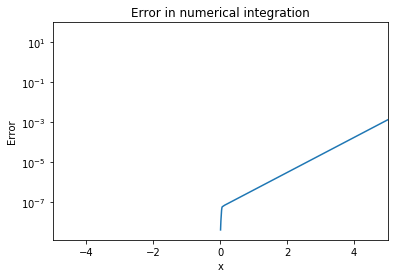

In [4]:
y_diff = np.abs(y_exact-listY)
plt.semilogy(xs, y_diff)
plt.ylabel("Error")
plt.xlabel("x")
plt.xlim([-5,5])
plt.title("Error in numerical integration")

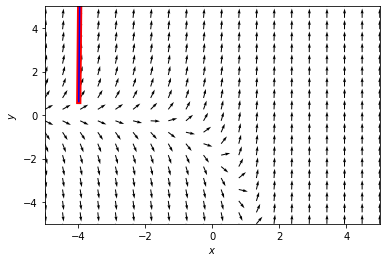

In [9]:
import matplotlib.pyplot as plt
from scipy import *
from scipy import integrate
from scipy.integrate import ode
import numpy as np
import math 

fig = plt.figure(num=1)
ax=fig.add_subplot(111)


## Vector field function
## x[0] = x // x[1] = y

def vf(t,x):
  dx=np.zeros(2)

  dx[0]=1
  dx[1]= 2*x[1] + 3*np.exp(-x[0]) ## <- Here equation of dy/dx
  return dx

##Solution curves
t0=0; tEnd=10; dt=0.01;
r = ode(vf).set_integrator('vode', method='bdf',max_step=dt)

##Initial conditions for ecah line with its color
ic=[[-4,-1]]
color=['r']
listY = [] ## Lista vacia para añadir valores de Y del for..


for k in range(len(ic)):
    Y=[];T=[];S=[];
    r.set_initial_value(ic[k], t0).set_f_params()
    while r.successful() and r.t +dt < tEnd:
        r.integrate(r.t+dt)
        Y.append(r.y)

    S=np.array(np.real(Y))
    ax.plot(S[:,0],S[:,1], color = color[k], lw = 5.25)
    
    for elem in S[:,1]:
        listY.append(elem)
        
    

##Vector field with its linespace(interval)
X,Y = np.meshgrid( np.linspace(-5,5,20),np.linspace(-5,5,20) )

V = 2*Y + 3*np.exp(X)  ## <- Here equation of dy/dx


##Normalize arrows not to have long arrows similar
U = 1
N = np.sqrt(U**2+V**2)  
U2, V2 = U/N, V/N
ax.quiver( X,Y,U2, V2)

##Analytical solution
xs = S[:,0]
y_exact2 = -np.exp(-xs) + 159773.83343196218*np.exp(2*xs)
plt.plot(xs, y_exact2, "-", color = "b")



##Limits of the graph
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.show()

Text(0.5, 1.0, 'Error in numerical integration')

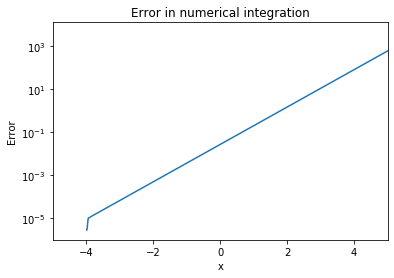

In [10]:
y_diff = np.abs(y_exact2-listY)
plt.semilogy(xs, y_diff)
plt.ylabel("Error")
plt.xlabel("x")
plt.xlim([-5,5])
plt.title("Error in numerical integration")